In [178]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_boston
%matplotlib inline
np.random.seed(42)

In [203]:
def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def data_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    #f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    f = np.reshape(features,[n_training_samples,n_dim])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

In [204]:
features,labels = read_boston_data()
normalized_features = feature_normalize(features)
f, l = data_reshape(normalized_features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

In [205]:
n_samples = f.shape[0]

In [199]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))
b = tf.Variable(tf.ones([1]))

init = tf.initialize_all_variables()

In [200]:
y_ = tf.add(tf.matmul(X, W), b)
#cost = tf.reduce_mean(tf.square(y_ - Y))
cost = tf.reduce_sum(tf.pow(y_ - Y, 2))/(2*n_samples)
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 0050 cost= 101.196777344
Epoch: 0100 cost= 50.600219727
Epoch: 0150 cost= 28.434288025
Epoch: 0200 cost= 18.569324493
Epoch: 0250 cost= 14.100242615
Epoch: 0300 cost= 12.019495964
Epoch: 0350 cost= 11.008198738
Epoch: 0400 cost= 10.483911514
Epoch: 0450 cost= 10.187278748
Epoch: 0500 cost= 10.001490593
Epoch: 0550 cost= 9.873044968
Epoch: 0600 cost= 9.776812553
Epoch: 0650 cost= 9.700487137
Epoch: 0700 cost= 9.637685776
Epoch: 0750 cost= 9.584832191
Epoch: 0800 cost= 9.539722443
Epoch: 0850 cost= 9.500874519
Epoch: 0900 cost= 9.467208862
Epoch: 0950 cost= 9.437895775
Epoch: 1000 cost= 9.412277222
----------------------------------------------------------
MSE: 18.7758


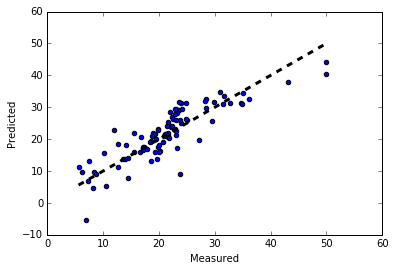

In [201]:
#sess = tf.Session()
#sess.run(init)
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
    
    
        if (epoch+1) % 50 == 0:
                c = sess.run(cost, feed_dict={X: train_x, Y:train_y})
                print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c)#, \
#                "W=", sess.run(W), "b=", sess.run(b)
    pred_y = sess.run(y_, feed_dict={X: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print "----------------------------------------------------------"
    print("MSE: %.4f" % sess.run(mse)) 

    fig, ax = plt.subplots()
    ax.scatter(test_y, pred_y)
    ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

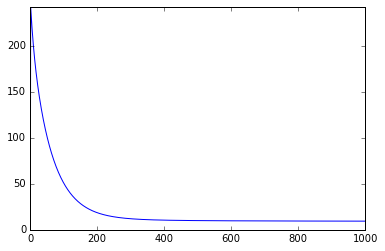

In [202]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()